## Назаров Алексей НПМбд-01-22

## Гауссово распределение, линейный дискриминантный анализ и наивный Байес

### 1. Многомерное гауссово распределение
Создайте случайную выборку данных с двумерным гауссовым распределением. Для этого сперва сделайте два вектора из двух одномерных распределений с разными стандартными отклонениями $\sigma_1$ и $\sigma_2$, как показано ниже:  
``` python
import numpy as np

M = 200
sigma1 = 0.1
sigma2 = 0.5
x1 = np.random.randn(M, 1) * sigma1
x2 = np.random.randn(M, 1) * sigma2
X = np.concatenate((x1, x2), axis=1)
```
После чего сделайте матрицу поворота на угол $\alpha$ и с помощью неё поверните набор точек в пространстве.  
Посчитайте матрицу ковариации для сгенерированных точек.  
Нарисуйте полученное облако точек и сравните его с облаком точек, полученных с помощью готовой функции:  `np.random.multivariate_normal()`


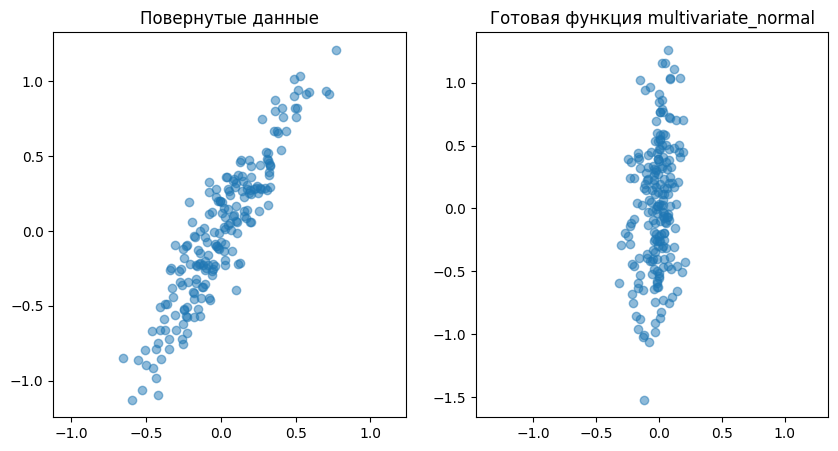

array([[0.07509747, 0.11993217],
       [0.11993217, 0.22722073]])

In [2]:
import numpy as np
import matplotlib.pyplot as plt

M = 200
sigma1 = 0.1
sigma2 = 0.5
alpha = 5*np.pi / 6

x1 = np.random.randn(M, 1) * sigma1
x2 = np.random.randn(M, 1) * sigma2
X = np.concatenate((x1, x2), axis=1)

rotation_matrix = np.array([[np.cos(alpha), -np.sin(alpha)],
                            [np.sin(alpha), np.cos(alpha)]])

X_rotated = X @ rotation_matrix.T

cov_matrix_rotated = np.cov(X_rotated, rowvar=False)

mean = [0, 0]
cov = [[sigma1**2, 0.01], [0.01, sigma2**2]]
X_multivariate = np.random.multivariate_normal(mean, cov, M)


plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_rotated[:, 0], X_rotated[:, 1], alpha=0.5)
plt.title('Повернутые данные')
plt.axis('equal')

plt.subplot(1, 2, 2)
plt.scatter(X_multivariate[:, 0], X_multivariate[:, 1], alpha=0.5)
plt.title('Готовая функция multivariate_normal')
plt.axis('equal')
plt.show()
cov_matrix_rotated

### 2. Плотность вероятности гауссового распределения
В общем виде $n$-мерное гауссово распределение имеет вид:  
$$p(x) = \frac{1}{(\sqrt{2\pi})^n \sqrt{detC}} e^{-\frac{1}{2}(x-\mu)^TС^{-1}(x-\mu)} \tag{1}$$  
где $x\in{R^n}$, $\mu\in{R^n}$ - среднее значение, $C$ - матрица ковариации.  

Сгенерируйте набор точек в двумерном пространстве (как делали в пункте 1 или другим способом). Посчитайте для них среднее значение и матрицу ковариации $\mu$ и $C$. Для оценки плотности вероятности (probability density function - `pdf`) гауссового распределения в произвольной точке используйте `scipy.stats.multivariate_normal`
(https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multivariate_normal.html), либо можете посчитать вручную.  

Визуализируйте набор точек и плотность вероятности, для чего изобразите точки одним цветом, а фон раскрасьте в соответсвии с плотностью вероятности, для чего можете использовать пример ниже:  

``` python
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import multivariate_normal

xx = np.linspace(-1, 1, 100)
yy = np.linspace(-1, 1, 100)
XX, YY = np.meshgrid(xx, yy)
pp = np.stack((XX.flatten(), YY.flatten()), axis=1)
m = multivariate_normal(mean=[0,0], cov=[[0.3, 0], [0, 0.1]])
ZZ = m.pdf(pp).reshape(XX.shape)

IMG = plt.pcolor(XX, YY, ZZ)
plt.colorbar(IMG)

CS = plt.contour(XX, YY, m.pdf(pp).reshape(XX.shape), levels=[0.2, 0.4, 0.6, 0.8, 0.9], colors='k')
plt.clabel(CS, inline=1, fontsize=10)
```

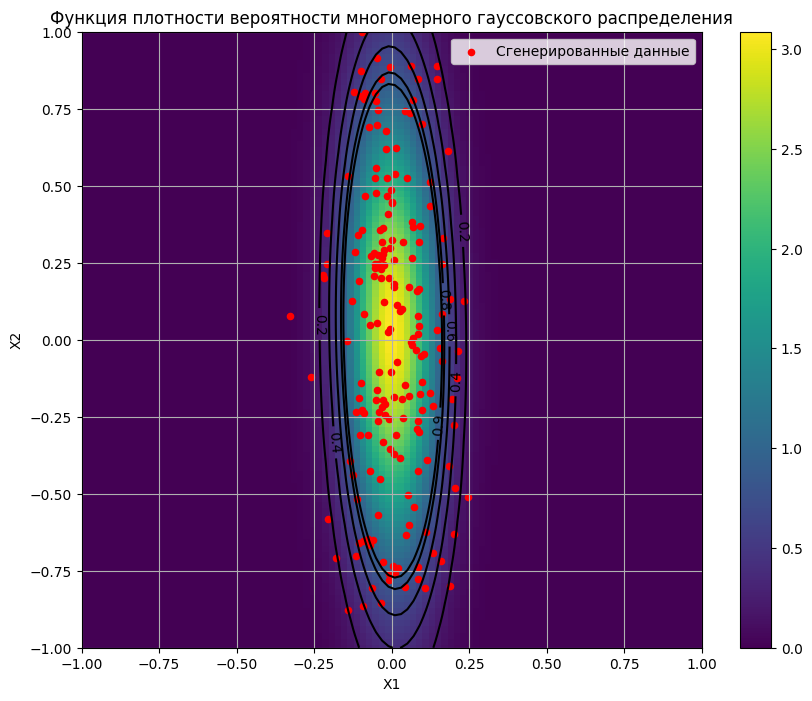

(array([0.00334623, 0.02910612]),
 array([[ 0.01020595, -0.00287612],
        [-0.00287612,  0.26013721]]))

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

M = 200
sigma1 = 0.1
sigma2 = 0.5

x1 = np.random.randn(M) * sigma1
x2 = np.random.randn(M) * sigma2
X = np.column_stack((x1, x2))

mu = np.mean(X, axis=0)
cov_matrix = np.cov(X, rowvar=False)

xx = np.linspace(-1, 1, 100)
yy = np.linspace(-1, 1, 100)
XX, YY = np.meshgrid(xx, yy)
pp = np.stack((XX.flatten(), YY.flatten()), axis=1)

m = multivariate_normal(mean=mu, cov=cov_matrix)
ZZ = m.pdf(pp).reshape(XX.shape)

plt.figure(figsize=(10, 8))

IMG = plt.pcolor(XX, YY, ZZ, shading='auto', cmap='viridis')
plt.colorbar(IMG)

CS = plt.contour(XX, YY, ZZ, levels=[0.2, 0.4, 0.6, 0.8, 0.9], colors='k')
plt.clabel(CS, inline=1, fontsize=10)

plt.scatter(X[:, 0], X[:, 1], color='red', s=20, label='Сгенерированные данные')

plt.title('Функция плотности вероятности многомерного гауссовского распределения')
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.grid()
plt.show()

mu, cov_matrix

#### Комментарии по визуализации:
На графике красные точки представляют собой сгенерированные данные

Цвет фона показывает плотность вероятности: чем более яркий цвет, тем выше плотность вероятности в данной области

Черные линии представляют собой контуры плотности

### 3. Бинарная классификация

**Задание**
Создайте случайный датасет, состоящий из двух классов $y\in{\{0, 1\}}$, а признаки имеют две координаты. Посчитайте для каждого класса среднее значение и матрицу ковариации $\mu_0, \mu_1$ и $C_0, C_1$.

Решение задачи классификации можно свести к оценке максимальной апостериорной вероятности (Maximum a posterior - MAP):
$$y = \underset{y\in{0,1}}{argmax} p(y|x) \tag{2}$$  
которая в свою очередь через теорему Байеса равна:  
$$p(y|x) = \frac{p(x|y)p(y)}{p(x)} \tag{3}$$
В последней формуле вероятность p(y) называется априорной и не зависит от $x$ - оценить её можно просто как долю точек датасета принадлежащего заданному классу $y$. Вероятность p(x|y) называют правдоподобием (likelyhood). Обычно правдоподобие моделируется некоторой генерирующей моделью, например по формуле гаусса (1), и говорит насколько правдоподобно что точка с координатами $x$ могла быть "сгенерирована" в классе $y$. Знаменатель $p(x)$ в последней формуле не зависит от $y$, поэтому на него внимание не обращаем.  

Таким образом, для бинарной классификации, т.е. для оценки принадлежности некоторой точки $x$ к классу 0 или 1, нужно сравнить две величины:  
$$p(x|y=0)p(y=0) \overset{?}{<>} p(x|y=1)p(y=1) \tag{4}$$

**Задание**
Визуализируейте на одном рисунке датасет с точками обоих классов разными цветами. Раскрасьте фон изображения в соответствии с разностью логарифмов левой и правой частей уравнения (4) (лучше упростить выражение). Постройте на этом же рисунке разделяющую кривую, т.е. кривую соответствующую нулевой разнице между левой и правой частями. Для её построения используйте функции `plt.contour` с указанием конкретного уровня.

Среднее для класса 0: [ 1.02136218 -0.97162287]
Среднее для класса 1: [1.03033502 0.95008006]
Ковариационная матрица для класса 0:
 [[1.37146464 0.76547765]
 [0.76547765 0.48434277]]
Ковариационная матрица для класса 1:
 [[ 0.92594275 -0.72061781]
 [-0.72061781  0.67198062]]


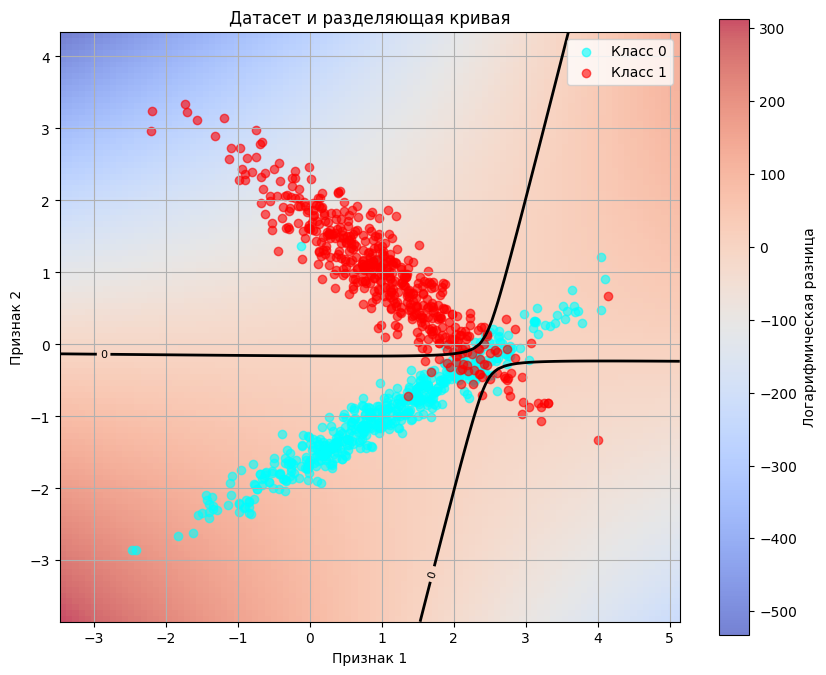

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from scipy.stats import multivariate_normal

n_samples = 1000
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, random_state=42)

X0 = X[y == 0]
X1 = X[y == 1]

mu_0 = np.mean(X0, axis=0)
mu_1 = np.mean(X1, axis=0)
C_0 = np.cov(X0, rowvar=False)
C_1 = np.cov(X1, rowvar=False)

print("Среднее для класса 0:", mu_0)
print("Среднее для класса 1:", mu_1)
print("Ковариационная матрица для класса 0:\n", C_0)
print("Ковариационная матрица для класса 1:\n", C_1)

p_y0 = len(X0) / n_samples
p_y1 = len(X1) / n_samples

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

p_x_given_y0 = multivariate_normal.pdf(np.dstack((xx, yy)), mean=mu_0, cov=C_0)
p_x_given_y1 = multivariate_normal.pdf(np.dstack((xx, yy)), mean=mu_1, cov=C_1)

log_diff = np.log(p_x_given_y0 * p_y0) - np.log(p_x_given_y1 * p_y1)

plt.figure(figsize=(10, 8))

img = plt.imshow(log_diff, extent=(x_min, x_max, y_min, y_max), origin='lower',
                 cmap='coolwarm', alpha=0.7)

plt.scatter(X0[:, 0], X0[:, 1], color='cyan', label='Класс 0', alpha=0.6)
plt.scatter(X1[:, 0], X1[:, 1], color='red', label='Класс 1', alpha=0.6)

contour = plt.contour(xx, yy, log_diff, levels=[0], colors='k', linewidths=2)
plt.clabel(contour, inline=True, fontsize=8)

plt.title('Датасет и разделяющая кривая')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend()
plt.grid()

cbar = plt.colorbar(img, label='Логарифмическая разница')
plt.show()

### 4. LDA (linear discriminant analysis)

**Задание** Рассмотрите частный случай, когда для точек двух классов матрицы ковариации совпадают, т.е. $C_0=C_1$, но средние значения отличаются $\mu_0\neq\mu_1$. Выпишите явное выражение для разделяющей поверхности в этом случае. Визуализируйте такой случай аналогично предыдущему пункту. Про линейный и квадратичный дискриминантный анализ можете почитать здесь (https://scikit-learn.org/stable/modules/lda_qda.html) или в учебнике Яндекса по ML (https://education.yandex.ru/handbook/ml/article/generativnyj-podhod-k-klassifikacii)

Реализуйте классификатор на основе метода линейного дискриминантного анализа по шаблону ниже. Данный алгоритм предполагает одинаковость матриц ковариации (т.е. считает одну общую матрицу ковариации, но разные средние) и использует линейное правило классификации. Желательно сделать реализацию, которая подходит не только для двумерного, но и для более общего случая.

```python
from sklearn.base import BaseEstimator

class myLDA(BaseEstimator):
    def __init__(self):
        pass
    
    def fit(self, X, y):
        pass
    
    def predict(self, X):
        pass
```


Когда матрицы ковариации классов равны $C_0=C_1=C$ и средние значения различаются $\mu_0\neq\mu_1$, разделяющая поверхность может быть выражена в виде:

$$\text{argmax}_y \left( -\frac{1}{2} (x - \mu_0)^T C^{-1} (x - \mu_0) + \log p(y=0) \right) = \text{argmax}_y \left( -\frac{1}{2} (x - \mu_1)^T C^{-1} (x - \mu_1) + \log p(y=1) \right)$$

При упрощении, получаем линейное уравнение:

$$x^T C^{-1} (\mu_1 - \mu_0) = \log \left( \frac{p(y=1)}{p(y=0)} \right)$$

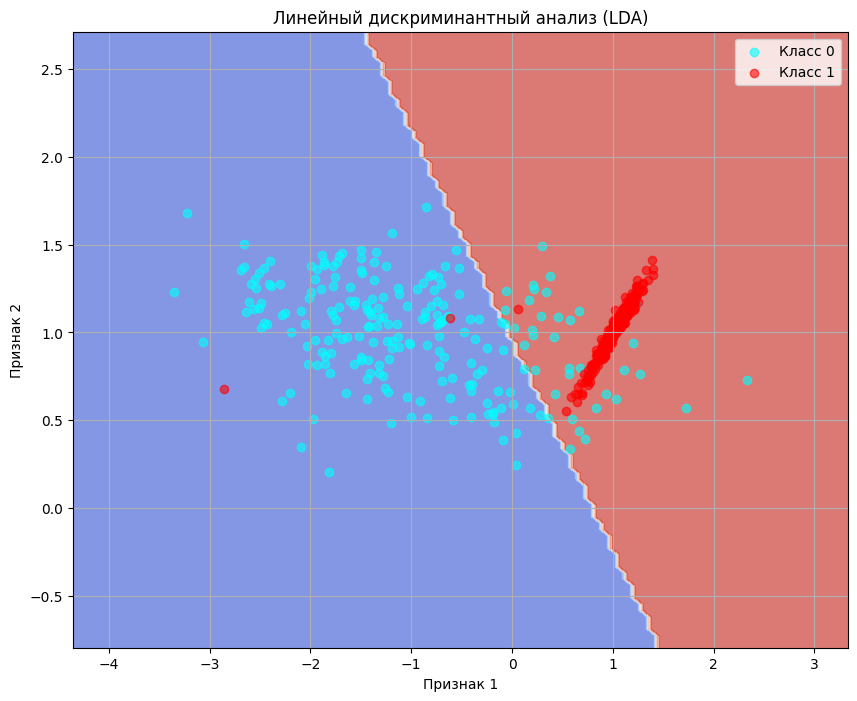

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.base import BaseEstimator
from scipy.stats import multivariate_normal

class myLDA(BaseEstimator):
    def __init__(self):
        self.mu_0 = None
        self.mu_1 = None
        self.C_inv = None
        self.prior_0 = None
        self.prior_1 = None

    def fit(self, X, y):

        X0 = X[y == 0]
        X1 = X[y == 1]

        self.mu_0 = np.mean(X0, axis=0)
        self.mu_1 = np.mean(X1, axis=0)

        C = np.cov(X, rowvar=False)
        self.C_inv = np.linalg.inv(C)

        self.prior_0 = len(X0) / len(X)
        self.prior_1 = len(X1) / len(X)

    def predict(self, X):
        decision_boundary = (X @ self.C_inv @ (self.mu_1 - self.mu_0)) - \
                            0.5 * (self.mu_1 @ self.C_inv @ self.mu_1) + \
                            0.5 * (self.mu_0 @ self.C_inv @ self.mu_0) + \
                            np.log(self.prior_1 / self.prior_0)
        return (decision_boundary > 0).astype(int)

np.random.seed(52)
n_samples = 450
X, y = make_classification(n_samples=n_samples, n_features=2, n_informative=2,
                           n_redundant=0, n_clusters_per_class=1, random_state=52)

lda = myLDA()
lda.fit(X, y)

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

Z = lda.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.7, cmap='coolwarm')
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='cyan', label='Класс 0', alpha=0.6)
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='red', label='Класс 1', alpha=0.6)

plt.title('Линейный дискриминантный анализ (LDA)')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.legend()
plt.grid()
plt.show()

### 5. Наивный байесовый классификатор (NaiveBayes)

**Задание**
Прочитать по наивный байесовый подход можно здесь (https://scikit-learn.org/stable/modules/naive_bayes.html) или в учебнике Яндекса по ML (https://education.yandex.ru/handbook/ml/article/generativnyj-podhod-k-klassifikacii).  

Суть наивного предположения состоит в том, чтобы не считать совместную плотность вероятности для $n$-мерного случая, а рассматривать каждую переменную как независимую и считать одномерные распределения:  
$$p(x_1,x_2,...,x_n|y) => \prod\limits_{i=1}^{n}p(x_i|y)$$  
Это можно также рассматривать как обнуление всех внедиагональных элементов матрицы ковариации.  

**Задание**
Реализуйте классификатор на основе наивного байесового подхода с одномерным гауссовым распределением для каждой переменной. Желательно сделать реализацию, которая подходит не только для двумерного, но и для более общего случая.

```python
from sklearn.base import BaseEstimator

class myNB(BaseEstimator):
    def __init__(self):
        pass
    
    def fit(self, X, y):
        pass
    
    def predict(self, X):
        pass
```

In [4]:
import numpy as np
from sklearn.base import BaseEstimator

class myNB(BaseEstimator):
    def __init__(self):
        self.means_ = {}
        self.vars_ = {}
        self.priors_ = {}
        self.classes_ = None

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        n_samples, n_features = X.shape

        for cls in self.classes_:
            X_cls = X[y == cls]
            self.means_[cls] = X_cls.mean(axis=0)
            self.vars_[cls] = X_cls.var(axis=0)
            self.priors_[cls] = X_cls.shape[0] / n_samples

    def predict(self, X):
        n_samples = X.shape[0]
        posteriors = np.zeros((n_samples, len(self.classes_)))

        for idx, cls in enumerate(self.classes_):
            prior = np.log(self.priors_[cls])
            likelihood = -0.5 * np.sum(np.log(2 * np.pi * self.vars_[cls]))
            likelihood -= 0.5 * np.sum(((X - self.means_[cls]) ** 2) / self.vars_[cls], axis=1)

            posteriors[:, idx] = prior + likelihood

        return self.classes_[np.argmax(posteriors, axis=1)]

### 6. Сравнение двух алгоритмов: LDA и NB

Создайте датасет для бинарной классификации, либо вручную либо используйте функцию `sklearn.datasets.make_classification`
(https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html)  

Разделите датасет на обучающую и тестовую подвыборки.  
Проверьте работоспособность разработанных вами двух алгоритмов.  
Посчитайте основные метрики классификации: долю правильных ответов (accuracy), точность (Precision) и полноту (Recall).  
(про метрики прочитайте здесь https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii)  
Сделайте выводы.  

In [14]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.base import BaseEstimator

class myNB(BaseEstimator):
    def __init__(self):
        self.means_ = {}
        self.vars_ = {}
        self.priors_ = {}
        self.classes_ = None

    def fit(self, X, y):
        self.classes_ = np.unique(y)
        n_samples, n_features = X.shape

        for cls in self.classes_:
            X_cls = X[y == cls]
            self.means_[cls] = X_cls.mean(axis=0)
            self.vars_[cls] = X_cls.var(axis=0)
            self.priors_[cls] = X_cls.shape[0] / n_samples

    def predict(self, X):
        n_samples = X.shape[0]
        posteriors = np.zeros((n_samples, len(self.classes_)))

        for idx, cls in enumerate(self.classes_):
            prior = np.log(self.priors_[cls])
            likelihood = -0.5 * np.sum(np.log(2 * np.pi * self.vars_[cls]))
            likelihood -= 0.5 * np.sum(((X - self.means_[cls]) ** 2) / self.vars_[cls], axis=1)

            posteriors[:, idx] = prior + likelihood

        return self.classes_[np.argmax(posteriors, axis=1)]

class myLDA(BaseEstimator):
    def __init__(self):
        self.mu_0 = None
        self.mu_1 = None
        self.C_inv = None
        self.prior_0 = None
        self.prior_1 = None

    def fit(self, X, y):
        X0 = X[y == 0]
        X1 = X[y == 1]

        self.mu_0 = np.mean(X0, axis=0)
        self.mu_1 = np.mean(X1, axis=0)

        C = np.cov(X, rowvar=False)
        self.C_inv = np.linalg.inv(C)

        self.prior_0 = len(X0) / len(X)
        self.prior_1 = len(X1) / len(X)

    def predict(self, X):
        decision_boundary = (X @ self.C_inv @ (self.mu_1 - self.mu_0)) - \
                            0.5 * (self.mu_1 @ self.C_inv @ self.mu_1) + \
                            0.5 * (self.mu_0 @ self.C_inv @ self.mu_0) + \
                            np.log(self.prior_1 / self.prior_0)
        return (decision_boundary > 0).astype(int)


X, y = make_classification(n_samples=1000, n_features=5, n_informative=3, n_redundant=0, n_classes=2, random_state=41)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

nb = myNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)

lda = myLDA()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)

accuracy_lda = accuracy_score(y_test, y_pred_lda)
precision_lda = precision_score(y_test, y_pred_lda)
recall_lda = recall_score(y_test, y_pred_lda)


print("Наивный Байес:")
print(f"Accuracy: {accuracy_nb:.2f}, Precision: {precision_nb:.2f}, Recall: {recall_nb:.2f}")

print("\nЛинейный дискриминантный анализ:")
print(f"Accuracy: {accuracy_lda:.2f}, Precision: {precision_lda:.2f}, Recall: {recall_lda:.2f}")


Наивный Байес:
Accuracy: 0.86, Precision: 0.90, Recall: 0.81

Линейный дискриминантный анализ:
Accuracy: 0.84, Precision: 0.90, Recall: 0.76
